# RTA Analysis for the Tax amount collected in Telangana 2023

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# data source https://data.telangana.gov.in/dataset/regional-transport-authority-vehicle-registrations-data
# Fetch and read all the data
folder_path = 'rta-files'
import os
# iterate and find all csv file paths
csv_files = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))


In [6]:
csv_files
# read the first file data
df = pd.read_csv(csv_files[0])
df.columns
# Add the rest of the files data
for file in csv_files[1:]:
    df1 = pd.read_csv(file)
    df = pd.concat([df, df1])

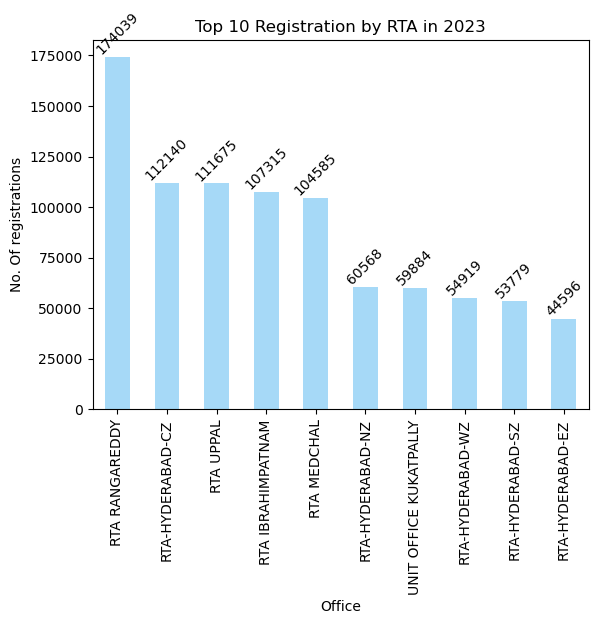

In [7]:
df.columns

# Get the counts of registrations based on `OfficeCd`
per_office = df['OfficeCd'].value_counts()

# Get the top 5 and plot them with data labels and titles
top_5 = per_office.head(10)
top_5.plot(kind='bar',color="#A6D9F7", width=0.5)
plt.xlabel('Office')
plt.ylabel('No. Of registrations')
plt.title('Top 10 Registration by RTA in 2023')
# plt.figure(figsize=(20, 6))
# Show data number
for i, v in enumerate(top_5):
    plt.text(i, v, f'{str(v)}', ha='center', va='bottom', rotation=45)
plt.show()


In [8]:
df.columns
# Get the taxAmt sum based on OfficeCd
per_office_tax = df.groupby('OfficeCd')['taxAmt'].sum()/1e7
# Sort by taxAmt
per_office_tax = per_office_tax.sort_values(ascending=False)
per_office_tax.head()


OfficeCd
RTA RANGAREDDY       1724.980924
RTA-HYDERABAD-CZ     1097.713254
RTA UPPAL             734.517243
RTA MEDCHAL           682.834316
RTA IBRAHIMPATNAM     650.613298
Name: taxAmt, dtype: float64

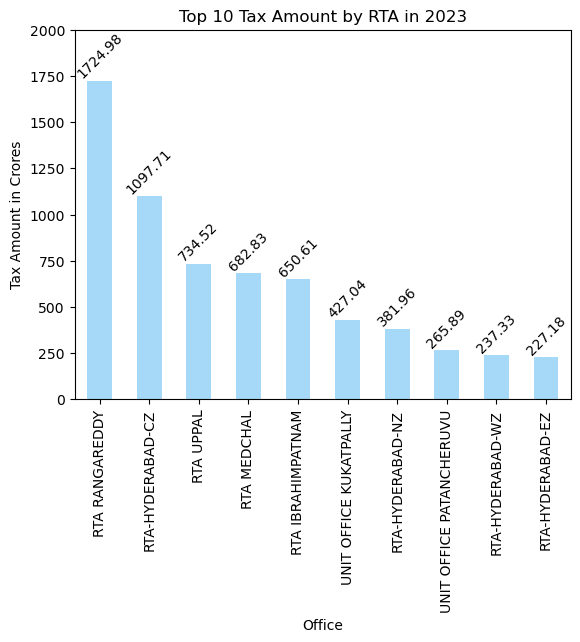

In [9]:
# round off taxAmnt to two decimals
per_office_tax = per_office_tax.round(2)

top_10_tax = per_office_tax.head(10)

top_10_tax.plot(kind='bar',color="#A6D9F7", width=0.5)
plt.xlabel('Office')
plt.ylabel('Tax Amount in Crores')
plt.title('Top 10 Tax Amount by RTA in 2023')
plt.ylim(0,2000)
for i, v in enumerate(top_10_tax):
    plt.text(i, v, f'{str(v)}', ha='center', va='bottom', rotation=45)

plt.show()

In [10]:
top_10_tax

OfficeCd
RTA RANGAREDDY              1724.98
RTA-HYDERABAD-CZ            1097.71
RTA UPPAL                    734.52
RTA MEDCHAL                  682.83
RTA IBRAHIMPATNAM            650.61
UNIT OFFICE KUKATPALLY       427.04
RTA-HYDERABAD-NZ             381.96
UNIT OFFICE PATANCHERUVU     265.89
RTA-HYDERABAD-WZ             237.33
RTA-HYDERABAD-EZ             227.18
Name: taxAmt, dtype: float64

In [11]:
# get the maximum taxAmt
df['taxAmt'].max()
# Get the record with max taxAmt
max_record = df[df['taxAmt'] == df['taxAmt'].max()]
max_record

,slno,invoiceAmt,registrationNo,vehicleClass,taxAmt,dateOfTransaction,OfficeCd,fromdate,todate
98293,9060767,358442639.0,TS22H1335,Crane Mounted,26883200.0,23/02/2022,RTA PEDDAPALLI,22/02/2022,23/02/2022
104041,9060767,358442639.0,TS22H1335,Crane Mounted,26883200.0,23/02/2022,RTA PEDDAPALLI,23/02/2022,24/02/2022


In [12]:
# Find duplicates based on registrationNo
duplicates = df[df.duplicated(subset=['registrationNo'])]
len(duplicates)
duplicates.head()


,slno,invoiceAmt,registrationNo,vehicleClass,taxAmt,dateOfTransaction,OfficeCd,fromdate,todate
316,547611,0.0,AP13N4319,MOTOR CAR,26500.0,01/08/2023,RTA-HYDERABAD-WZ,01/08/2023,02/08/2023
338,488685,0.0,AP13N8414,MOTOR CYCLE,3790.0,01/08/2023,RTA-HYDERABAD-WZ,01/08/2023,02/08/2023
2110,1385453,0.0,ap36ak5797,MOTOR CYCLE,4440.0,02/08/2023,RTA WARANGAL,01/08/2023,02/08/2023
4090,404655,0.0,AP11AC5025,MOTOR CYCLE,3990.0,01/08/2023,RTA-HYDERABAD-EZ,01/08/2023,02/08/2023
5235,671305,0.0,AP22AG0454,MOTOR CYCLE,4080.0,02/08/2023,RTA WANAPARTHY,01/08/2023,02/08/2023


In [13]:
duplicates['OfficeCd'].value_counts()

RTA RANGAREDDY              84287
RTA-HYDERABAD-CZ            54396
RTA UPPAL                   54050
RTA IBRAHIMPATNAM           51918
RTA MEDCHAL                 50563
RTA-HYDERABAD-NZ            29323
UNIT OFFICE KUKATPALLY      28969
RTA-HYDERABAD-WZ            26586
RTA-HYDERABAD-SZ            26009
RTA-HYDERABAD-EZ            21625
UNIT OFFICE PATANCHERUVU    18662
RTA HANUMAKONDA             15813
RTA KHAMMAM                 14738
RTA KARIMNAGAR              13635
UNIT OFFICE PARGI           13440
RTA MAHABOOBNAGAR           13347
RTA SIDDIPET                12770
RTA WARANGAL                12710
RTA NALGONDA                11873
RTA NIZAMABAD               11726
RTA YADADRI                 11294
RTA KAMAREDDY               11027
RTA SANGAREDDY               9860
UNIT OFFICE MIRYALAGUDA      9684
RTA MANCHERIAL               9487
RTA BHADRADRI                9100
RTA SURYAPET                 8550
RTA MEDAK                    8396
RTA MAHABUBABAD              8061
RTA NIRMAL    

In [14]:
len(duplicates), len(df)

(782434, 1616575)

In [15]:
# Get the max registrations fromdate
df['vehicleClass'].value_counts()

MOTOR CYCLE                                   1221042
MOTOR CAR                                      354785
Motor Cab                                       29678
Motor Cycle for Hire                             3136
Omnibus for Private Use                          2877
Vehicle Fitted with Construction Equipment       2528
Mopeds and Motorised Cycle                        563
Adapted Vehicle                                   516
Loader                                            473
Crane For Private Use                             242
Self Loading Concrete Mixer                       206
Jeep                                              136
Road Roller                                       136
Fork Lift                                          77
Crane Mounted                                      70
MOTOR GRADER                                       42
Auto Rikckshaw Private                             28
Dumper/Excavator                                   10
Other Vehicle               

In [16]:
df['taxAmt'].sum()/1e7



9222.4195698

In [17]:
per_office_tax.tail(10)

OfficeCd
UNIT OFFICE RAMAGUNDAM     30.67
UNIT OFFICE WYRA           26.60
UNIT OFFICE SATTUPALLI     26.32
UNIT OFFICE KORUTLA        25.29
UNIT OFFICE BHODAN         24.96
RTA KOMRAMBHEEM            24.19
UNIT OFFICE HUZURABAD      22.60
UNIT OFFICE KALWAKURTHY    15.98
RTA MULUGU                  9.37
UNIT OFFICE PEBBAIR         7.31
Name: taxAmt, dtype: float64

In [18]:
per_office.tail(10)

UNIT OFFICE KORUTLA        8795
RTA VIKARABAD              8731
UNIT OFFICE BHODAN         8428
UNIT OFFICE WYRA           8239
UNIT OFFICE RAMAGUNDAM     7862
UNIT OFFICE HUZURABAD      6911
UNIT OFFICE SATTUPALLI     6715
UNIT OFFICE KALWAKURTHY    4589
RTA MULUGU                 3031
UNIT OFFICE PEBBAIR        2556
Name: OfficeCd, dtype: int64

In [19]:
# Get all RTA MEDCHAL records
medchal_records = df[df['OfficeCd'] == 'RTA MEDCHAL']
ibptnm_records = df[df['OfficeCd'] == 'RTA IBRAHIMPATNAM']

In [20]:
medchal_records['vehicleClass'].value_counts(), ibptnm_records['vehicleClass'].value_counts()

(MOTOR CYCLE                                   72199
 MOTOR CAR                                     29270
 Motor Cab                                      2680
 Omnibus for Private Use                         176
 Vehicle Fitted with Construction Equipment      153
 Loader                                           31
 Adapted Vehicle                                  22
 Self Loading Concrete Mixer                      18
 Road Roller                                       8
 Fork Lift                                         8
 MOTOR GRADER                                      7
 Jeep                                              4
 Auto Rikckshaw Private                            4
 Mopeds and Motorised Cycle                        2
 Crane Mounted                                     2
 Crane For Private Use                             1
 Name: vehicleClass, dtype: int64,
 MOTOR CYCLE                                   75917
 MOTOR CAR                                     29059
 Motor Cab 

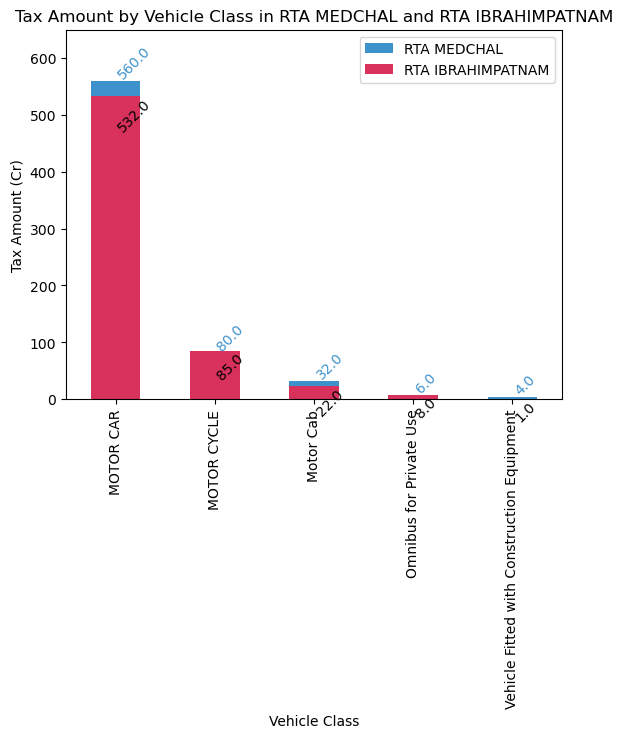

In [21]:
# get the tax amount in medchal office grouped by vehicleClass
medchal_tax = medchal_records.groupby('vehicleClass')['taxAmt'].sum()/1e7
ibptnm_tax = ibptnm_records.groupby('vehicleClass')['taxAmt'].sum()/1e7
# sort both
medchal_tax = medchal_tax.sort_values(ascending=False)
ibptnm_tax = ibptnm_tax.sort_values(ascending=False)

# Plot them
medchal_tax.head(5).plot(kind='bar', color='#3E92CC') # apply red color for y axis
# plt.legend(['RTA MEDCHAL']
ibptnm_tax.head(5).plot(kind='bar',color='#D8315B') # apply red color for y axis
plt.legend(['RTA MEDCHAL', 'RTA IBRAHIMPATNAM'])
plt.xlabel('Vehicle Class')
plt.ylabel('Tax Amount (Cr)')
plt.ylim(0,650)
# show data labels
for i, v in enumerate(medchal_tax.head(5)):
    plt.text(i, v, f'{str(round(v,0))}', ha='left', va='bottom',color='#3E92CC',rotation=45)
for i, v in enumerate(ibptnm_tax.head(5)):
    plt.text(i, v, f'{str(round(v,0))}', ha='left', va='top',color='black',rotation=45)
plt.title('Tax Amount by Vehicle Class in RTA MEDCHAL and RTA IBRAHIMPATNAM')
plt.show()


In [22]:
# Get RTA RANGAREDDY data
rangareddy_records = df[df['OfficeCd'] == 'RTA RANGAREDDY']
rangareddy_records_highest = rangareddy_records[rangareddy_records['dateOfTransaction'] == '14/11/2023']
len(rangareddy_records_highest)

748

In [23]:
# Get the value counts based on dateOfTransaction
df['dateOfTransaction'].value_counts()

15/11/2023    9048
11/12/2023    8704
10/04/2023    8618
09/11/2023    8536
11/09/2023    8428
              ... 
10/12/2023       2
14/05/2023       2
22/01/2023       2
08/01/2023       2
01/01/2023       1
Name: dateOfTransaction, Length: 284, dtype: int64

In [24]:
# Get the number of transactions in November month only
november_transactions = df[df['dateOfTransaction'].str.contains('/11/')]
len(november_transactions)/len(df)
# Value counts based on month of registration
def get_month(date):
    return date.split('/')[1]
df['month'] = df['dateOfTransaction'].apply(get_month)
df['month'].value_counts()


12    161099
11    154365
01    146383
08    142991
03    129183
05    128827
09    128427
10    127837
06    126683
07    123819
04    123798
02    123163
Name: month, dtype: int64

In [25]:
(df['taxAmt'].sum()/1e7)/(df['OfficeCd'].unique().size*300)

0.5589345193818182

Text(0, 0.5, 'No. Of Vehicles')

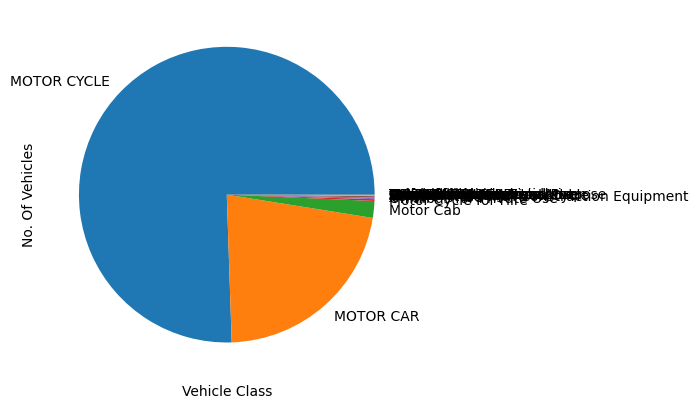

In [26]:
# Create a plot based on Vehicle Class
df['vehicleClass'].value_counts().plot(kind='pie')
plt.xlabel('Vehicle Class')
plt.ylabel('No. Of Vehicles')

Text(0, 0.5, 'No. Of Vehicles')

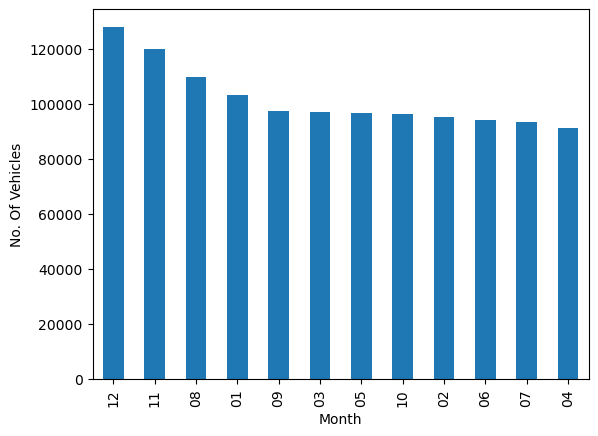

In [27]:
# Motor cycles vs month
motor_cycles = df[df['vehicleClass'] == 'MOTOR CYCLE']
# motor_cycles['month'] = df['dateOfTransaction'].apply(get_month)

motor_cycles['month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('No. Of Vehicles')